# WaterMeter Data
This is an on-site data collection study. The goal of the experiment is to collect water usage data from a place that uses underground data. The water usage for each segment of collected data corresponds to number of observed people using that aount of water. From these reading, the following can be deduced/answered:
- How mmuch water is consumed in total?
- In which time periods most water is consumed?
- How much water does each individual consumes?
- Does water consumption relate to time of day, temperature etc.?
- Is there a recurring trend in water usaged?
- Can this data be extrapolated, mapped and/or used to estimate water usage in other similar facilities?
- How much underground water is used in Islamabad in Masjid / Schools / Institutes?
- What can be done to reduce this water use?

## 1. Setup

In [201]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [202]:
# User Variables & Parameters
# Control Parameters
outputDirPath           = '../output/'
dataURL                 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT9OXksPciTFlLxjtgK64Z1690lzH7NrdfDJNJb9kPaWWOW58tfekMVi4KdkxzLdi3-nIiUh7L_oayt/pub?gid=0&single=true&output=csv'

# General Parameters
fromDate                = 11
toDate                  = 17
fromMonth               = 1
toMonth                 = 12
scalingConst            = 2.3
DF                      = pd.read_csv(dataURL)

# Processing Parameters
date                = DF['Date']
month               = DF['Month']
year                = DF['Year']
display             = DF['Day']
hour                = DF['Hour']
minute              = DF['Minute']
waterReading        = DF['Reading (ltr)']
people              = DF['People']
time                = []
peopleOverall       = []
waterConsumed       = []
totalWaterUsed      = 0.0
avgWaterUsedPrs     = 0.0


# Visualization Parameters
plt.rcParams["figure.figsize"] = (20,10)

## 2. Preprocessing

In [203]:
DF
# DF.to_csv(outputDirPath + 'watermeter_orignal.csv')

,Reading #,Date,Month,Year,Day,Hour,Minute,Reading (m3),Reading (ltr),People
0,1,11,3,2022,FRI,15,32,4.0,4000,5
1,2,11,3,2022,FRI,16,19,4.0,4000,0
2,3,14,3,2022,MON,12,15,5.5,5500,0
3,4,14,3,2022,MON,14,3,6.0,6000,93
4,5,14,3,2022,MON,16,50,6.5,6500,96
5,6,15,3,2022,TUES,12,7,7.0,7000,0
6,7,16,3,2022,WED,9,28,8.2,8200,0
7,8,16,3,2022,WED,10,50,8.5,8500,0
8,9,16,3,2022,WED,13,23,8.5,8500,92
9,10,17,3,2022,THUR,13,32,9.0,9000,89


In [204]:
# Converting Date, Hour and Minute readings onto a uniform scale
# Conversion loop
for item in range(0, len(date)):

    # Conversion process
    conv            = int(str(year[item]) + str(month[item]) + str(date[item]))
    conv            = conv + float((hour[item] / (24.0)) + (minute[item] / (24.0 * 60.0)))
    time.append(conv)

    # Year, month then date are concatenated as string then cast to integer
    # Rest of the readings from hours and minutes account for 0.0 - 1.0 maximum so hour is divided by 24 and minutes by 24*60

time


[2022311.6472222223,
 2022311.679861111,
 2022314.5104166667,
 2022314.5854166667,
 2022314.701388889,
 2022315.504861111,
 2022316.3944444444,
 2022316.451388889,
 2022316.557638889,
 2022317.5638888888]

In [205]:
# Calculating corresponding water readings
# # Loop to calculate remaining parameters
for item in range(0, len(waterReading)):

    # Calculating overall people
    peopleOverall.append(scalingConst * people[item])

    # Calculating water use i.e. difference from previous reading
    if item == 0:
        waterConsumed.append(0)
    else:
        waterConsumed.append(waterReading[item]  - waterReading[item-1])
    
    print(peopleOverall[item], waterConsumed[item])

11.5 0
0.0 0
0.0 1500
213.89999999999998 500
220.79999999999998 500
0.0 500
0.0 1200
0.0 300
211.6 0
204.7 500


## 3. Analysis

In [206]:
# Total water used
totalWaterUsed          = sum(waterReading) - waterReading[0]
print('Total water used (' + str(date[0]) + '/' + str(month[0]) + '/' + str(year[0]), 'to',
        str(date.iloc[-1]) + '/' + str(month.iloc[-1]) + '/' + str(year.iloc[-1]) + ')\t:\t',
        totalWaterUsed,
        'litres')

Total water used (11/3/2022 to 17/3/2022)	:	 63200 litres


In [207]:
# Average water used per person
avgWaterUsedPrs         = (totalWaterUsed / sum(peopleOverall)) / len(date)
print('Average water used per person (' + str(date[0]) + '/' + str(month[0]) + '/' + str(year[0]), 'to',
        str(date.iloc[-1]) + '/' + str(month.iloc[-1]) + '/' + str(year.iloc[-1]) + ')\t:\t',
        avgWaterUsedPrs,
        'litres')

Average water used per person (11/3/2022 to 17/3/2022)	:	 7.327536231884058 litres


## 4. Visualizations

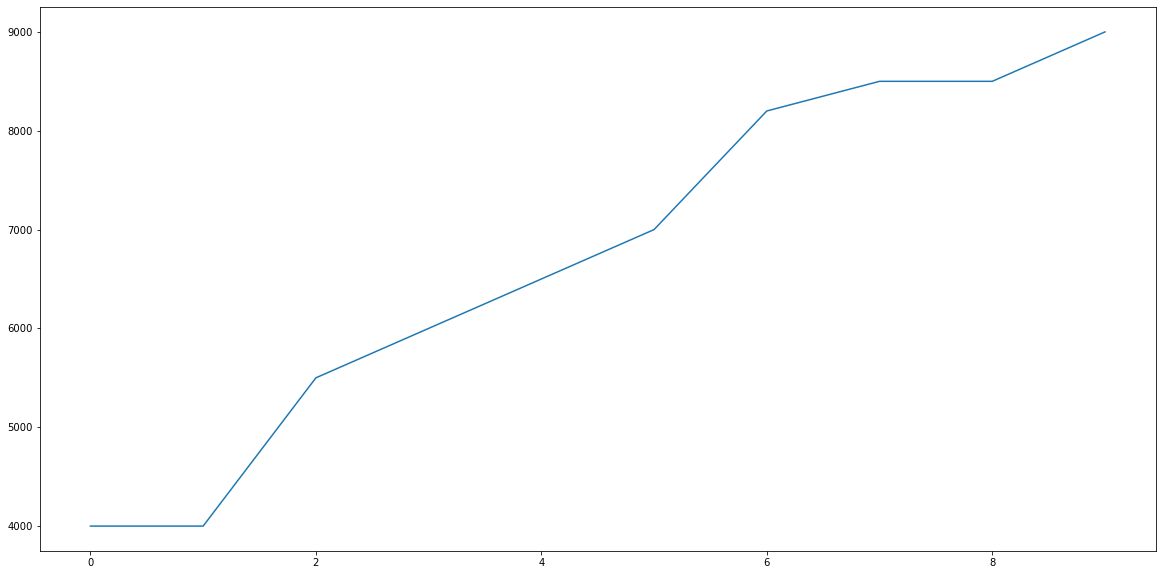

In [208]:
plt.plot(waterReading)
plt.show()

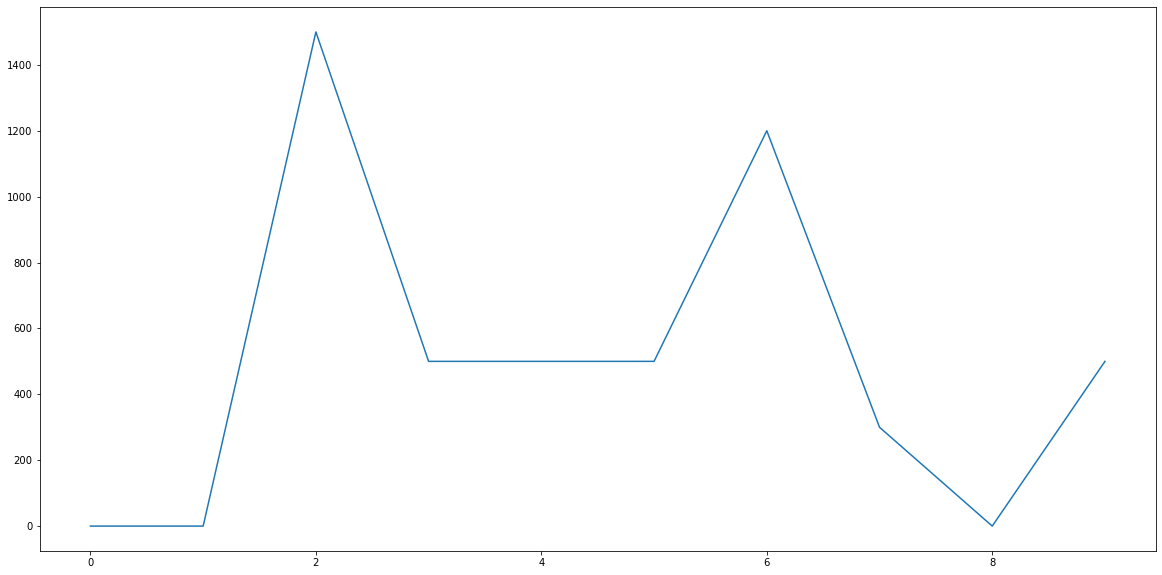

In [209]:
plt.plot(waterConsumed)
plt.show()

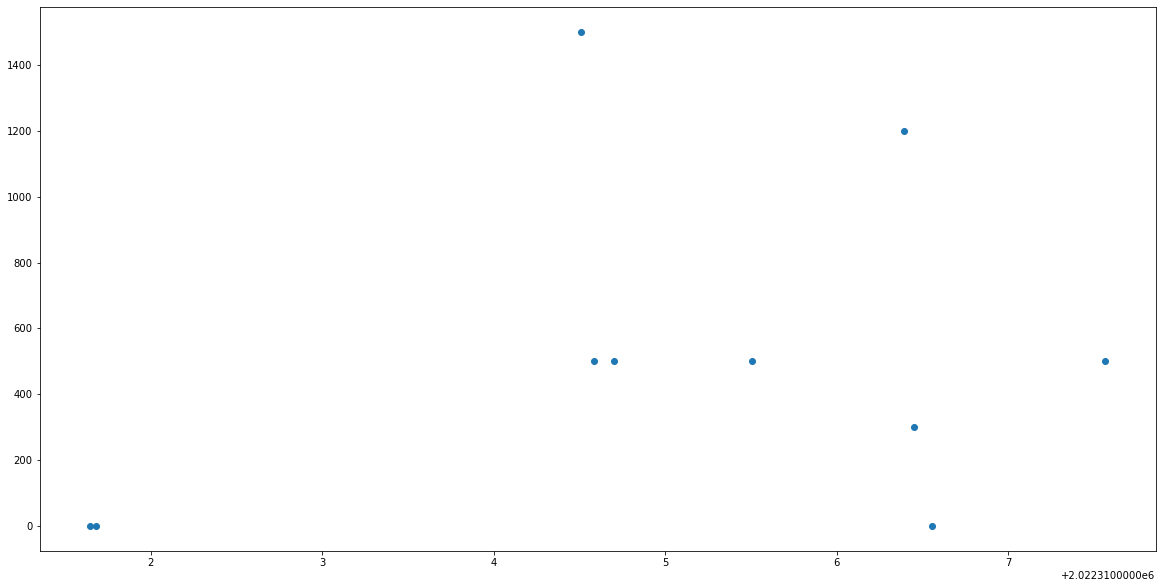

In [210]:
plt.scatter(time, waterConsumed)
plt.show()

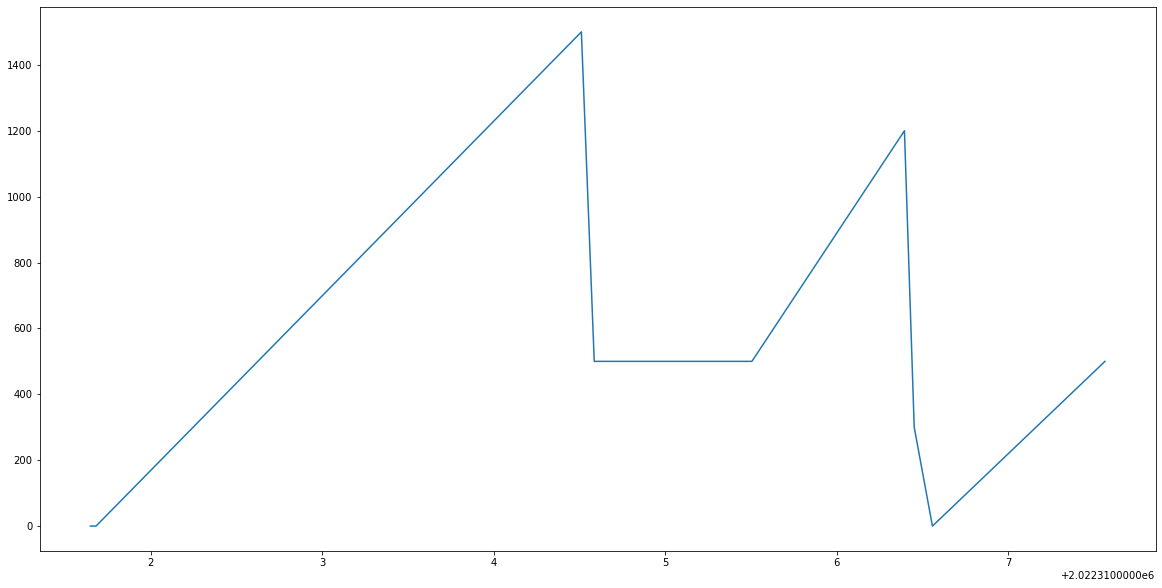

In [211]:
plt.plot(time, waterConsumed)
plt.show()

## 5. Extrapolation

In [227]:
# src: https://www.dawn.com/news/763577/islamabad-has-827-mosques (Number of mosques in Islamabad) (827) (From 2012)
# src: https://www.statista.com/statistics/753720/masjids-in-uk/ (Average capacity of mosque in Islamabad) (200) (Filled ~90-100)
# This is assuming all mosques use boring

# Caculuations
numDays             = int(str(year.iloc[-1]) + str(month.iloc[-1]) + str(date.iloc[-1])) - int(str(year[0]) + str(month[0]) + str(date[0]))
dailyWaterUse       = totalWaterUsed / numDays
dailyPeople         = 93 * scalingConst * 4
perPersonUse        = dailyWaterUse / dailyPeople

# Display
print('Number of days (data collected) :\t', numDays)
print('Daily water use :\t\t\t', dailyWaterUse)
print('Average number of people daily :\t', dailyPeople)
print('Water used per person :\t\t\t', perPersonUse)


Number of days (data collected) :	 6
Daily water use :			 10533.333333333334
Average number of people daily :	 855.5999999999999
Water used per person :			 12.311048776686928


In [238]:
# Estimation
totalPeople         = round(dailyPeople * 827)
totalWaterUsed      = totalPeople * perPersonUse

# Display
print('Total people using water (Mosques) :\t', totalPeople)
print('Total water used by all :\t\t', round(totalWaterUsed))

Total people using water (Mosques) :	 707581
Total water used by all :		 8711064
